# **WalMart Business Case**
**Walmart** is an American multinational retail corporation that operates chain or hypermarket, discount stores,departmental stores and grocery stores in the United states.It was founded in 1962 and over a period of six decades ,it has become a largest company in this segement.
As of now Walmart have aproximately 100M customers worldwide.

**Business Problem:** The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

**Dataset:** The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. 


#  **1. Data about the Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
df = pd.read_csv("walmart_data.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
len(df)

550068

### There are total of **550068** rows.
There are no columns with the **NULL** values.

#### **Column Name and Types**
***Total 10 Columns***

**User_ID:** 	User ID\
**Product_ID:** 	Product ID\
**Gender:** 	Sex of User\
**Age:** 	Age in bins\
**Occupation:** 	Occupation(Masked)\
**City_Category:** 	Category of the City (A,B,C)\
**StayInCurrentCityYears:** 	Number of years stay in current city\
**Marital_Status:** 	Marital Status\
**ProductCategory:** 	Product Category (Masked)\
**Purchase:** 	Purchase Amount 

### Some of the catogorical columns are defined as **integer**.We need to convert them to **string**.

In [6]:
df_corr = df.copy()
df["User_ID"]   = df["User_ID"].astype(str)
df["Occupation"]   = df["Occupation"].astype(str)
df["Marital_Status"]   = df["Marital_Status"].astype(str)
df["Product_Category"]   = df["Product_Category"].astype(str)

### Lets get **statistics** for all the columns

In [7]:
df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068,550068,550068,550068,550068,550068,550068,550068,550068,550068.000000
unique,5891,3631,2,7,21,3,5,2,20,NaN
top,1001680,P00265242,M,26-35,4,B,1,0,5,NaN
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


## **Type of Data**
1.  User_ID                    --> **Categorical(Nominal)**
2.  Product_ID                 --> **Catogorical(Nominal)**
3.  Gender                     --> **Catogorical(Nominal)**
4.  Age                        --> **Numerical(Discrete)**
5.  Occupation                 --> **Catogorical(Nominal)**
6.  City_Category              --> **Catogorical(Nominal)**
7.  Stay_In_Current_City_Years --> **Numerical(Discrete)**
8.  Marital_Status             --> **Catogorical(Nominal)**
9.  Product_Category           --> **Catogorical(Nominal)**
10. Purchase                   --> **Numerical(Continuous)**

#### **Mean,Median and Mode**
***Mode of the Categorical columns***\
Product_ID --> **P00265242**\
Gender     --> **M**\
Age        --> **26-36**\
Occupation --> **4**\
City_Category --> **B**\
Stay_In_Current_City_Years --> **1**\
Marital_Status --> **0**\
Product_Category --> **5**

***Mean and Median of Numerical columns***\
Purchase --> **8047**(Median),**9263**(Mean)

Since the **Purchase** column have very few outliear and the histogram is right skewed \
However the diffrance between the **Median** and **Mean** is not significant,
We take **Mean** (i.e. **9263**) as the central tendency measure.

### **Unique Values and Count**
#### Refer to the below table for details


In [8]:
print("Column_Name".ljust(26," "),"-->", "Unique_Count".ljust(5," "), "-->","Unique_Values")
for col in df.columns:
    print(col.ljust(26," "),"-->", str(len(df[col].unique())).ljust(12," "), "-->",df[col].unique())

Column_Name                --> Unique_Count --> Unique_Values
User_ID                    --> 5891         --> ['1000001' '1000002' '1000003' ... '1004113' '1005391' '1001529']
Product_ID                 --> 3631         --> ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Gender                     --> 2            --> ['F' 'M']
Age                        --> 7            --> ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation                 --> 21           --> ['10' '16' '15' '7' '20' '9' '1' '12' '17' '0' '3' '4' '11' '8' '19' '2'
 '18' '5' '14' '13' '6']
City_Category              --> 3            --> ['A' 'C' 'B']
Stay_In_Current_City_Years --> 5            --> ['2' '4+' '3' '1' '0']
Marital_Status             --> 2            --> ['0' '1']
Product_Category           --> 20           --> ['3' '1' '12' '8' '5' '4' '2' '6' '14' '11' '13' '15' '7' '16' '18' '10'
 '17' '9' '20' '19']
Purchase                   --> 18105        --> [ 8370 15

#  **2. Univariate Analysis**

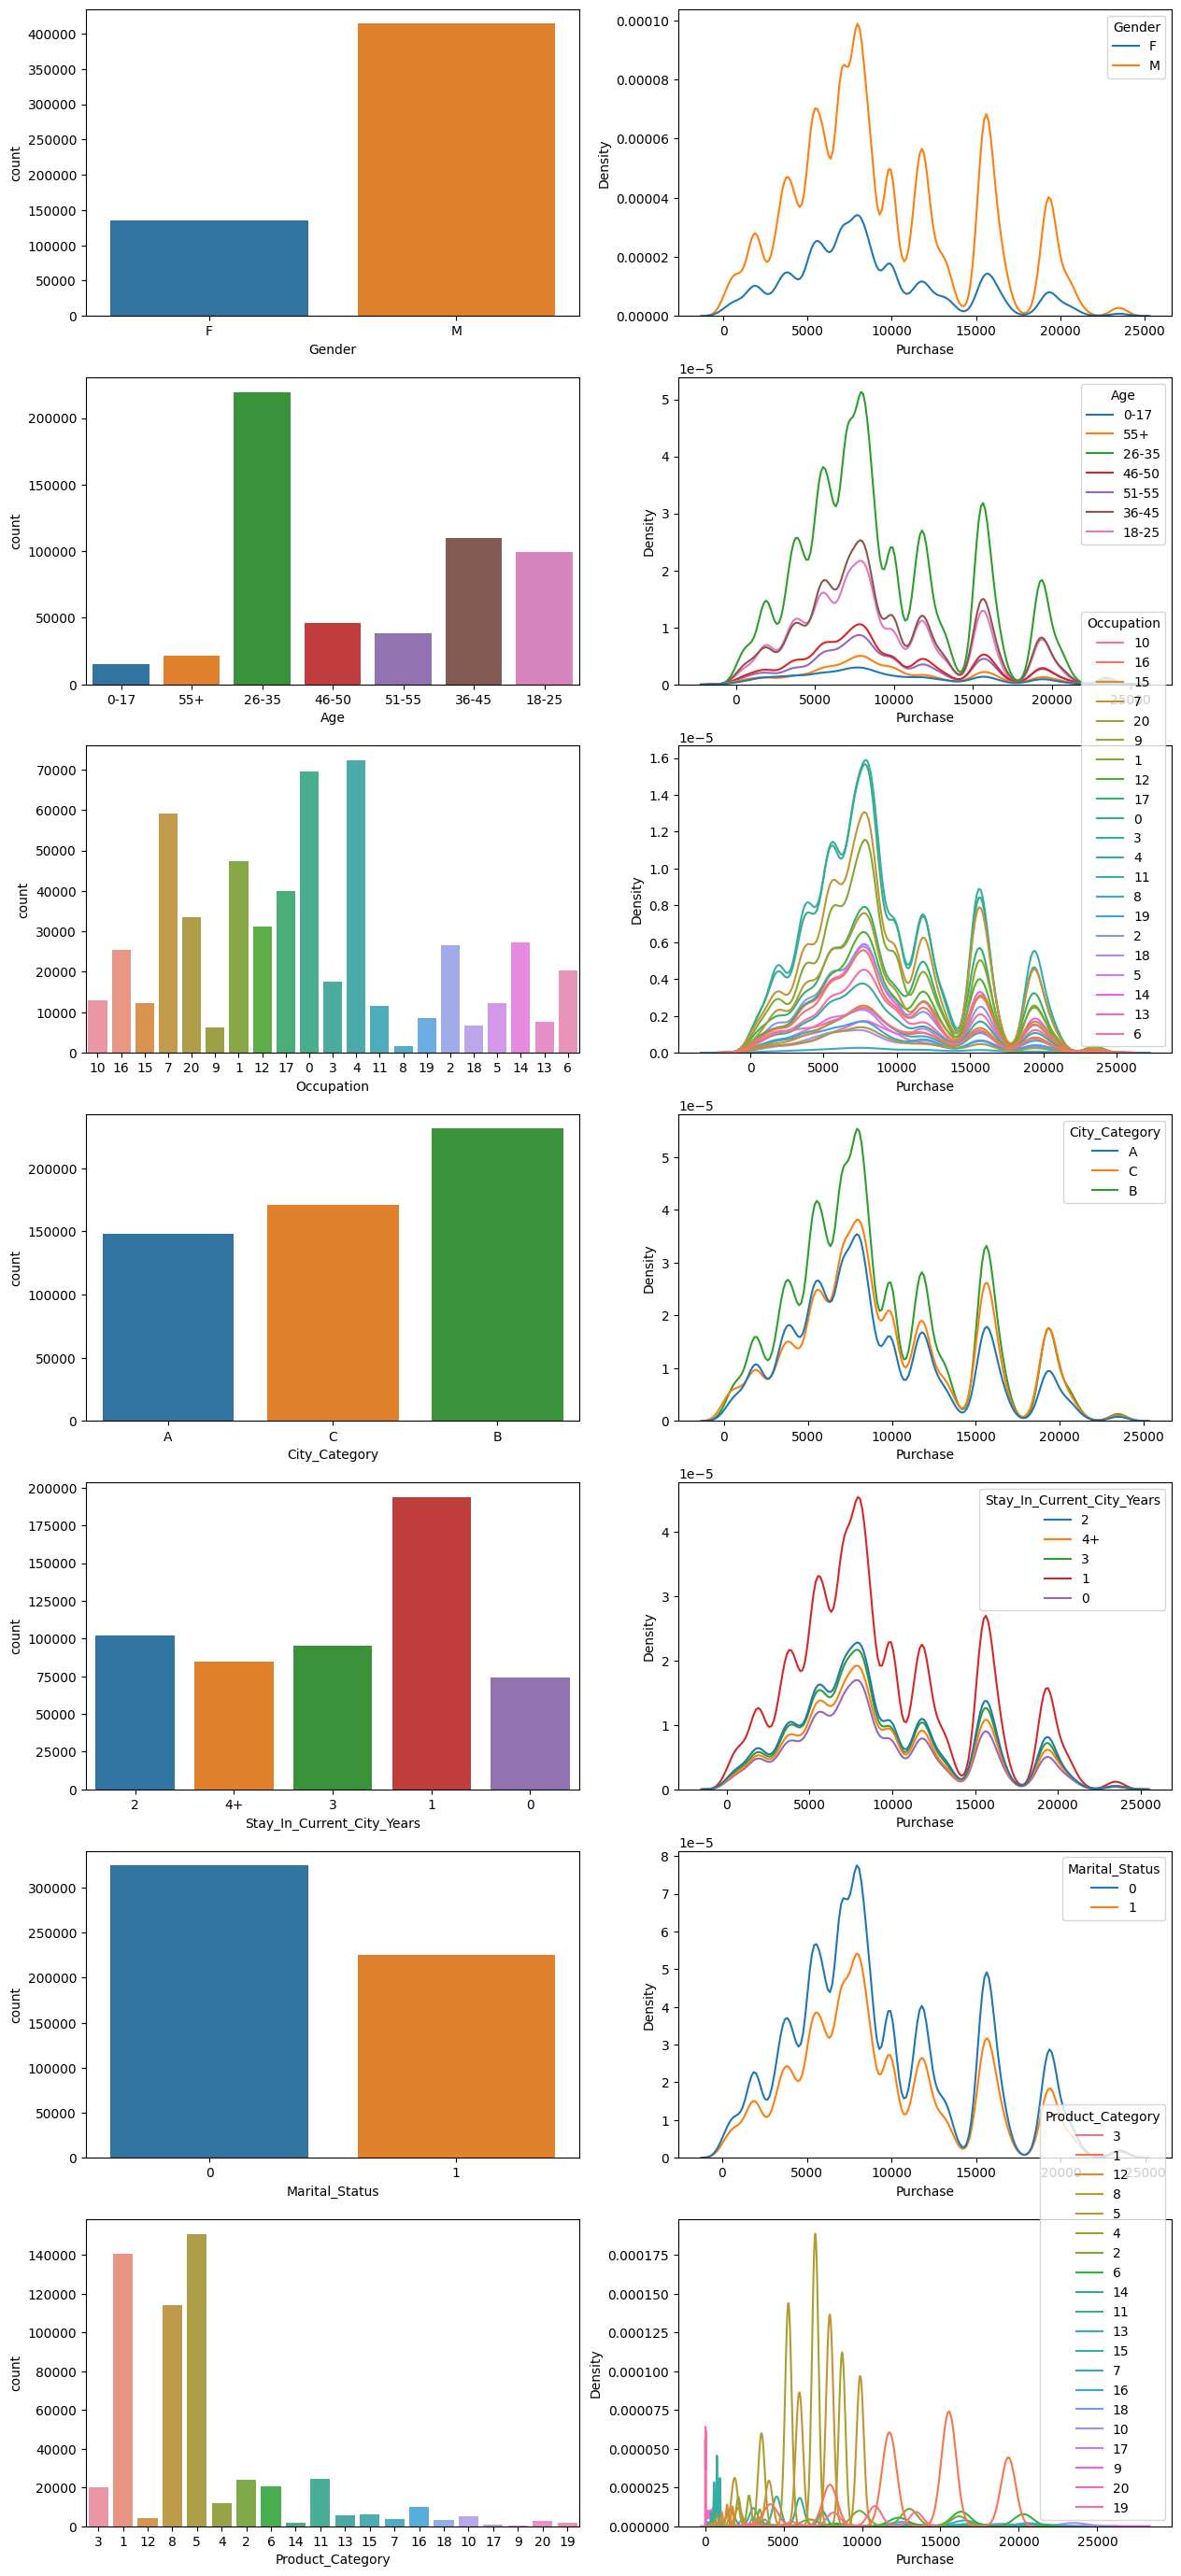

In [9]:
fig = plt.figure(figsize=(15,35))
i = 1
for col in ["Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status","Product_Category"]:
    plt.subplot(7,2,i)
    sns.countplot(data = df, x = col)
    i = i+1    
    
    plt.subplot(7,2,i)
    sns.kdeplot(data=df, x = "Purchase", hue = col)
    #sns.scatterplot(data=df, x = "Purchase", y = col)
    i = i+1

### ***Insights***
1. There are almost three time more orders placed by **Male** compare to the **Female** customers.
2. Purchase order amount is more dense between **5000** and **10000**.
3. Customers between **26-35** are purchasing more.
4. Customers with the occupation **7,1,17,0,4** are placing more orders.
5. Customers who are **relocated in the city recently in  last 1 years** are placing more orders.
6. Old customers from the same city are placing less orders.
7.  Product category **1,8,5** are most purchased products. 


#  **3. Bivariate Analysis**

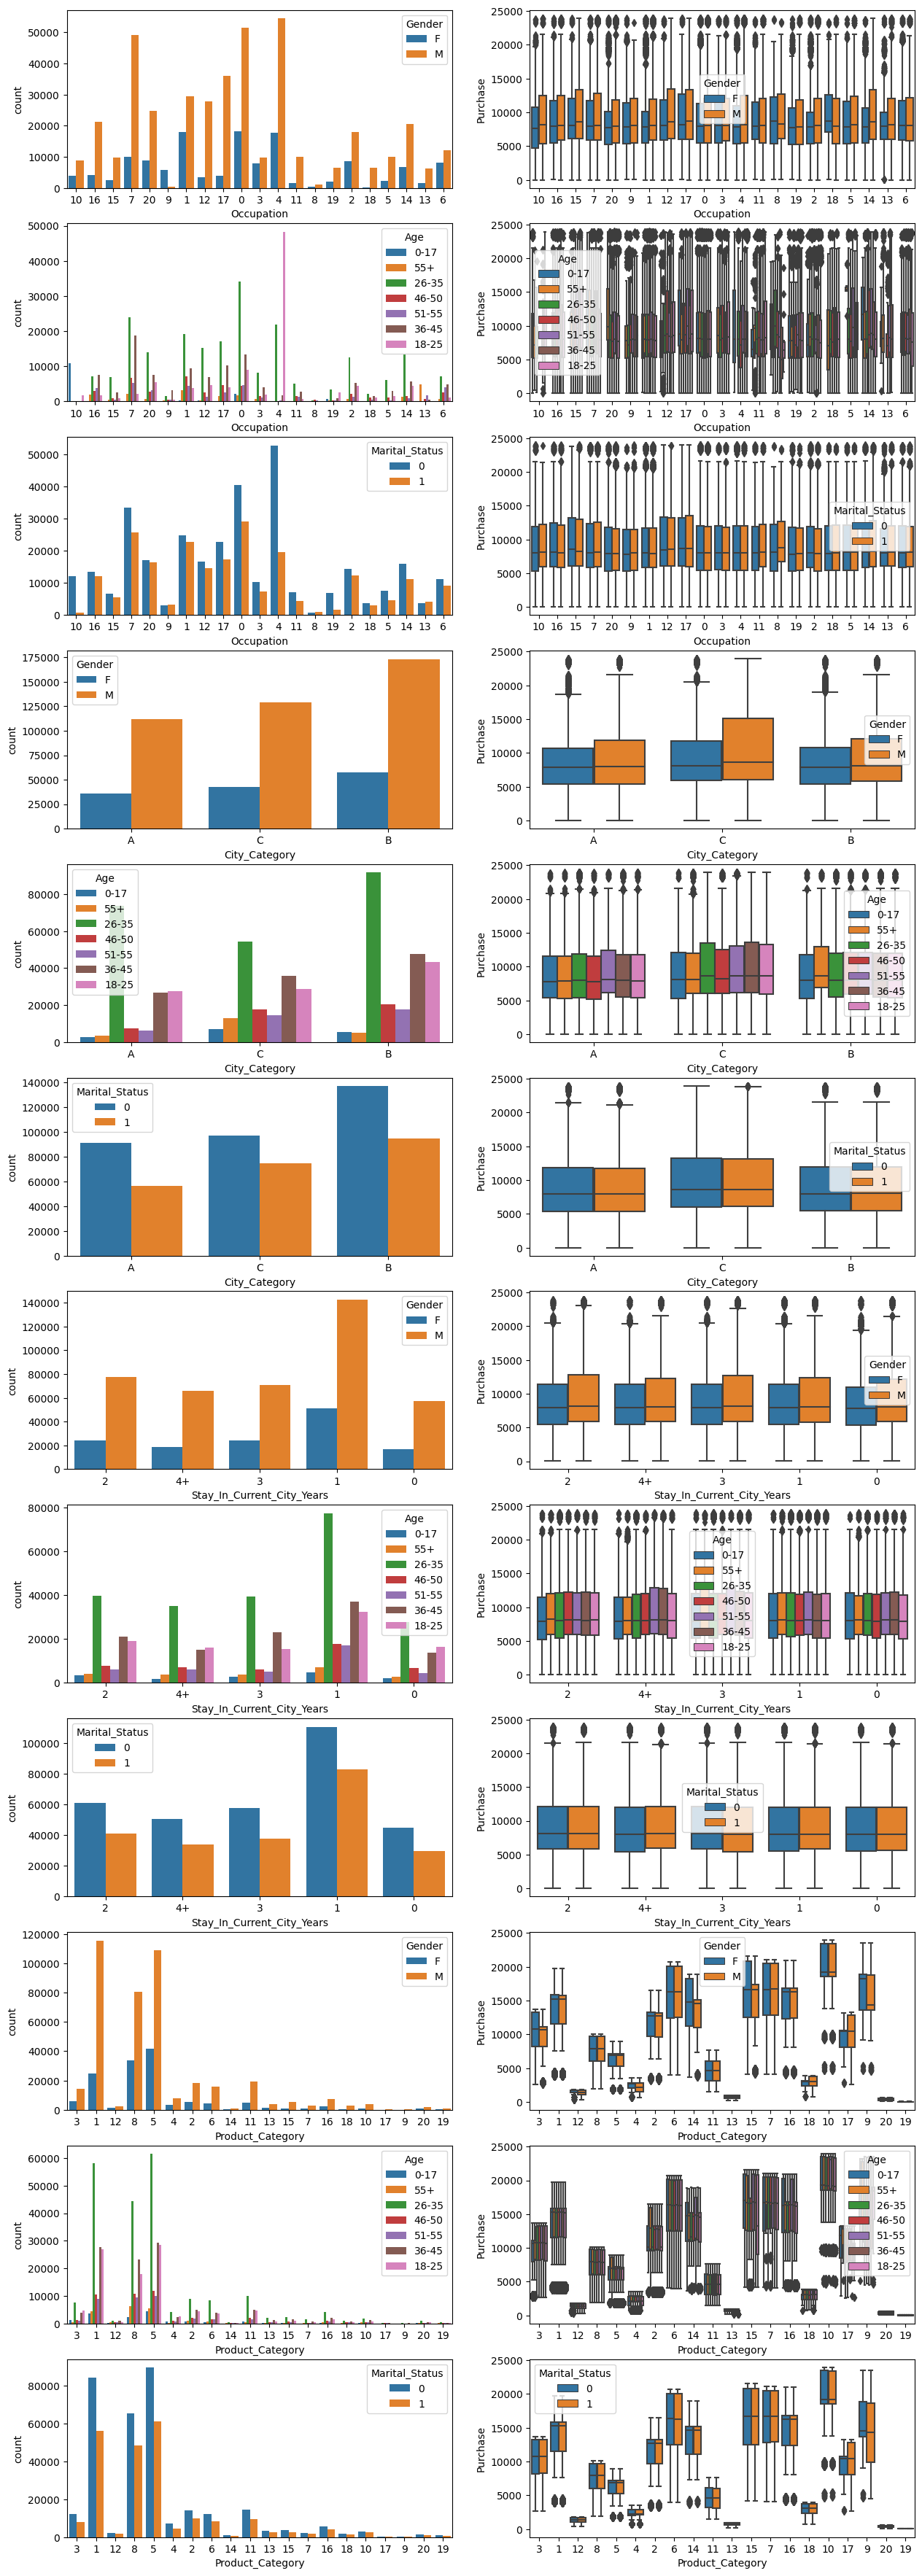

In [10]:
fig = plt.figure(figsize=(15,45))
i = 1
for col1 in ["Occupation","City_Category","Stay_In_Current_City_Years","Product_Category"]:
    for col2 in ["Gender","Age","Marital_Status"]:
        plt.subplot(12,2,i)
        sns.countplot(data = df, x = col1, hue= col2)
        i = i+1    
    
        plt.subplot(12,2,i)
        sns.boxplot(data=df, x = col1, y = "Purchase", hue = col2)
        #sns.scatterplot(data=df, x = "Purchase", y = col)
        i = i+1

### ***Insights***
1. Product Category **10,17,9** have significant diffrance in the purchase by **Married** and **Un-Married**.
1. Product Category **1,8,5** are more purchased by the customers of Age group **26-35**.
3. From the above graps its evident that the product category **1,8,5** falls in the range of under 15000.
and **10,7,6** are some expensive product category.Similarly **18,11,4,12** are under **5000** product category.


#  **4. correlations between columns**

<Axes: >

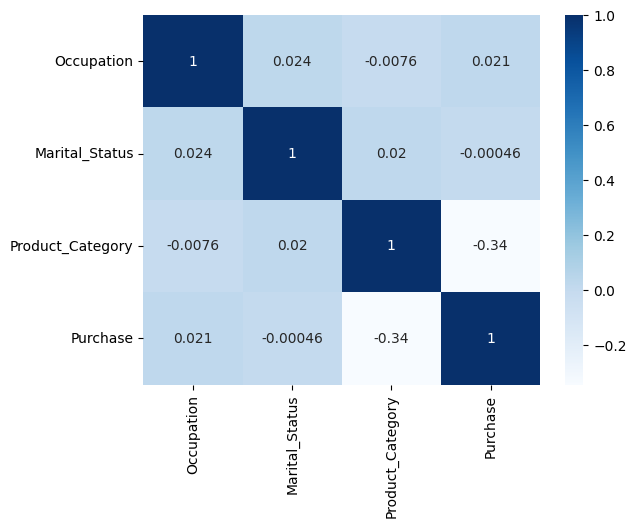

In [11]:
#df_corr.info()
df_corr = df[["Occupation","Marital_Status","Product_Category","Purchase"]].corr()
sns.heatmap(data = df_corr, cmap = "Blues",annot=True)

### ***Insights***
1. It is evident from the above table that no two colums are showing a good relationship.
2. Also,there is only one continous variable,So no benifit in finding the relationship.

#  **5. Male Vs Female average purchase analysis using CLT**

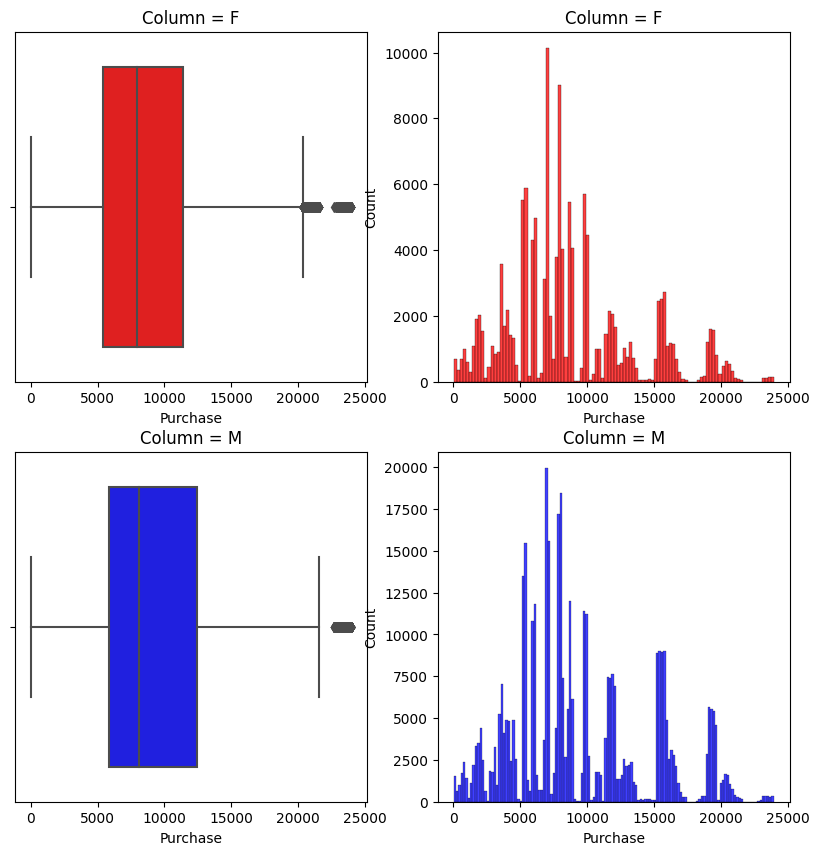

Mean Purchase for F: 8734.565765155476
Standard Deviation Purchase for F: 4767.233289291458

Mean Purchase for M: 9437.526040472265
Standard Deviation Purchase for M: 5092.18620977797



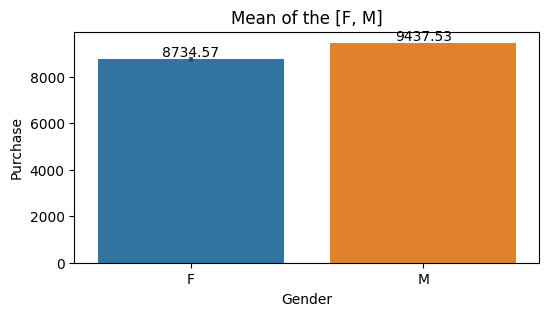

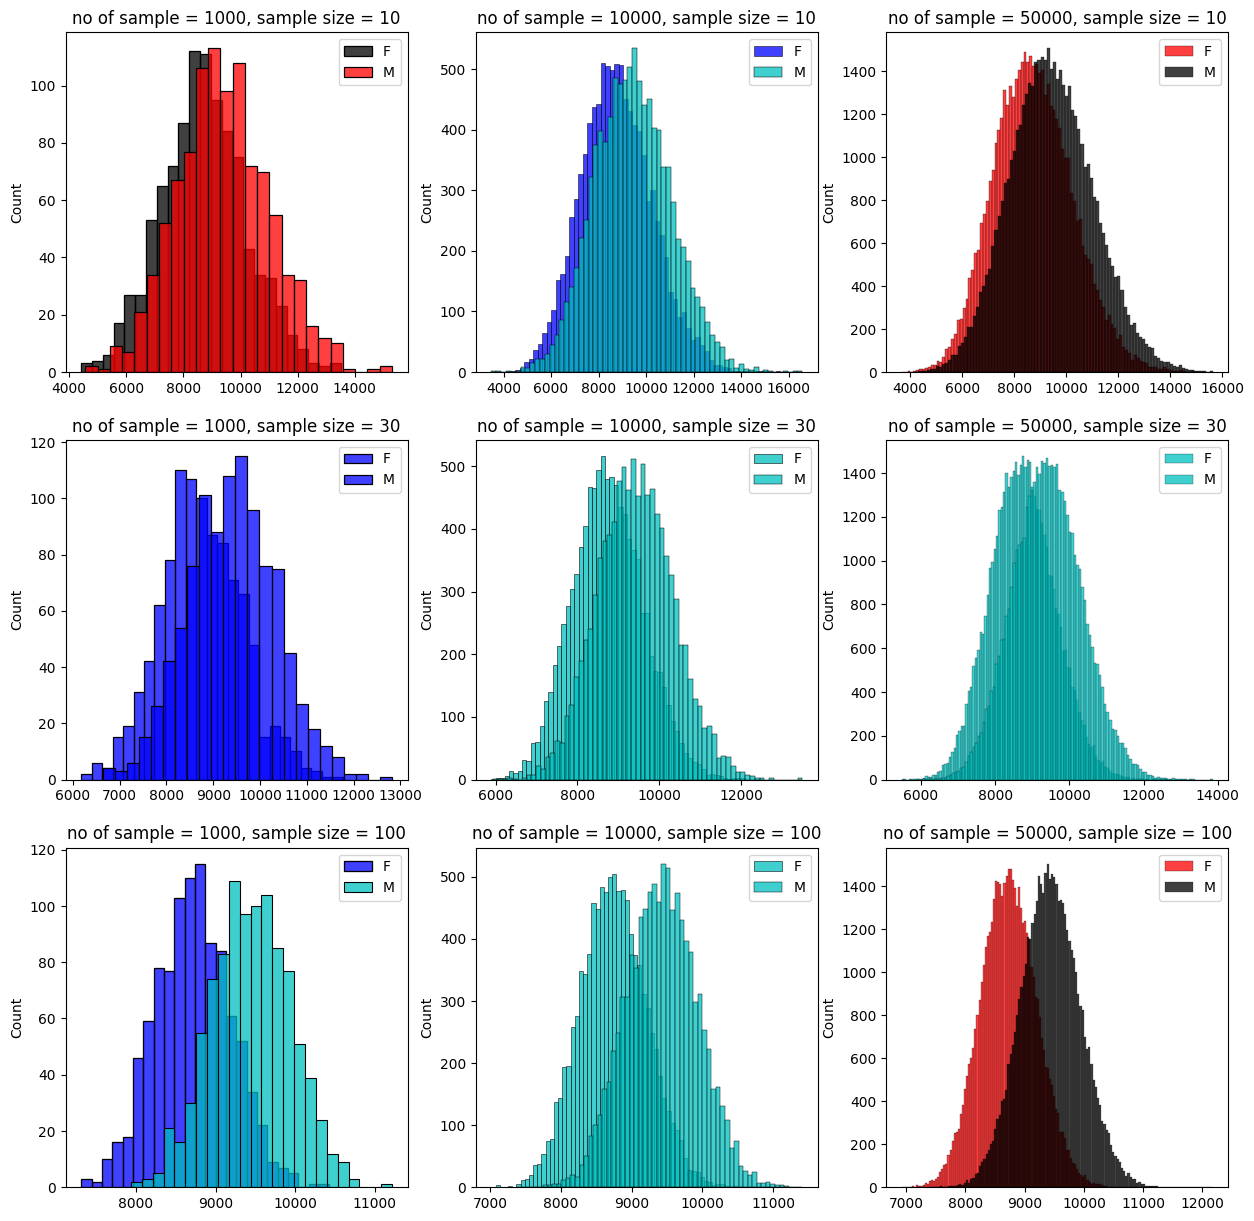

In [12]:
def my_viz_analysis(df,cont_var,cat_col):
    df_list = []
    mean_list = []
    std_list = []
    for col_val in df[cat_col].unique():
        data_dict = dict()
        data_dict["ColumnName"] = col_val
        data_dict["DataFrame"] = df[df[cat_col] == col_val]
        data_dict["Mean"] = df[df[cat_col] == col_val][cont_var].mean()
        data_dict["Std"] = df[df[cat_col] == col_val][cont_var].std()
        df_list.append(data_dict)

    fig = plt.figure(figsize=(10,len(df_list)*5))
    i = 1
    for df1 in df_list:
        color_cd = "brgy"[np.random.randint(0,4)]
        plt.subplot(len(df_list),2,i)
        sns.boxplot(data = df1["DataFrame"],x = cont_var, color = color_cd)
        plt.title(f"Column = {df1['ColumnName']}") 
        i = 1 + i

        plt.subplot(len(df_list),2,i)
        sns.histplot(data = df1["DataFrame"],x = cont_var,color = color_cd)
        plt.title(f"Column = {df1['ColumnName']}")
        i = 1 + i
    plt.show()
    
    for df_dict in df_list:
        print(f'Mean {cont_var} for {df_dict["ColumnName"]}:',df_dict["Mean"])
        print(f'Standard Deviation {cont_var} for {df_dict["ColumnName"]}:',df_dict["Std"])
        print()

    fig = plt.figure(figsize=(3*len(df_list),3))
    y = sns.barplot(data=df,x=cat_col,y=cont_var)
    y.bar_label(y.containers[0])
    plt.title(f"Mean of the [{', '.join([x['ColumnName'] for x in df_list])}]") 
    plt.show()

    fig = plt.figure(figsize=(15,15))
    i = 1    
    for sample_size in [10 ,30, 100]:
        for no_of_sample in [1000, 10000, 50000]:
            for df_dict in df_list:
                color_cd = "bryckm"[np.random.randint(0,6)]
                sample_mean_list = []
                for cnt in range(no_of_sample):
                    sample_mean_list.append(np.array(random.choices(np.array(df_dict["DataFrame"][cont_var]),k=sample_size)).mean())
                plt.subplot(3,3,i)
                ax = sns.histplot(sample_mean_list,color = color_cd,legend=True)
            plt.legend(labels = [x["ColumnName"] for x in df_list],loc='upper right')
            plt.title(f"no of sample = {no_of_sample}, sample size = {sample_size}")
            i = i+1
    plt.show()        

my_viz_analysis(df,"Purchase","Gender")

### The **Mean** purchase amount of the **Male and Female** customers are **9437.53** and **8734.57** respectively.
### However,this is a **Sample Mean** and not a **Population Mean**.
### In this case we need to calculate the **Mean** in the **Confidance Interval** format.

### The above are the disffrent **Sample Mean Distribution** histomgrams for **diffrent Sample size**.
### More the sample size ,smmother the Histogram.
### We can observer that most of the higtogram are **Normally Distributed**.

### We tried these histogram with the below mentioned combinations.

1. Sample Size = **10**, no# of Samples = **1000**
2. Sample Size = **10**, no# of Samples = **1000**
3. Sample Size = **10**, no# of Samples = **1000**
4. Sample Size = **30**, no# of Samples = **10000**
5. Sample Size = **30**, no# of Samples = **10000**
6. Sample Size = **30**, no# of Samples = **10000**
7. Sample Size = **100**, no# of Samples = **50000**
8. Sample Size = **100**, no# of Samples = **50000**
9. Sample Size = **100**, no# of Samples = **50000** --> **We are using this Sample Size for the analysis**


Confidence Interval of the Mean of the Purchase made by: Gender = F
90.0% Confidence Interval: 7950.356  -  9518.776
95.0% Confidence Interval: 7800.188  -  9668.943
99.0% Confidence Interval: 7506.526  -  9962.605

Confidence Interval of the Mean of the Purchase made by: Gender = M
90.0% Confidence Interval: 8599.861  -  10275.191
95.0% Confidence Interval: 8439.458  -  10435.595
99.0% Confidence Interval: 8125.779  -  10749.273



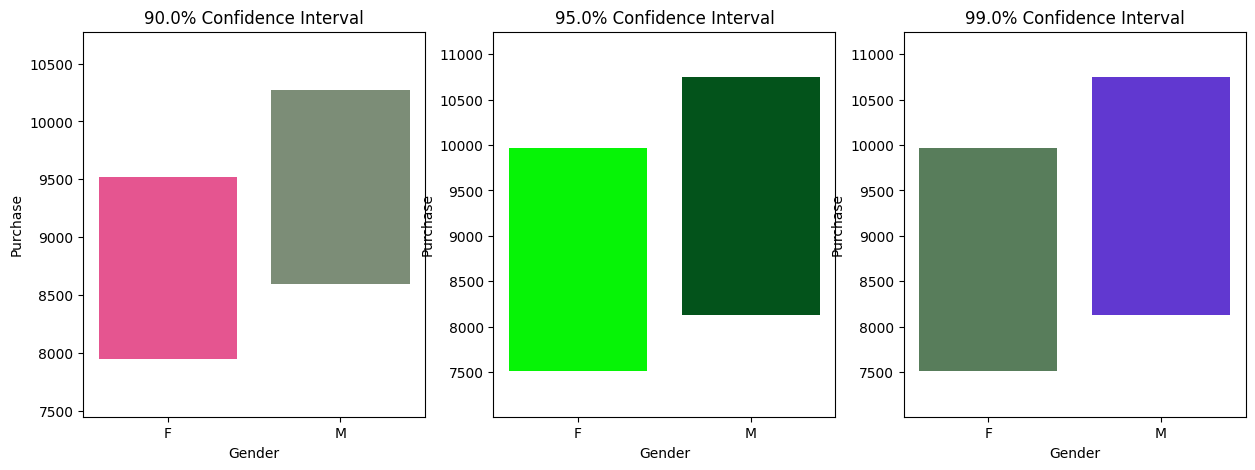

In [13]:
from scipy.stats import norm
import math
def get_z_score(per):
    return round(norm.ppf(0.5 + per/2),3)


def get_x_value(mu,sd,n,per = 0.95):
    return round((get_z_score(per) * (sd/math.sqrt(n)) + mu),3)

get_x_value(9437,5000.19,100,0.95)

def get_confidence_interval(df,num_col,cat_col): 
    chart_data_list = []
    for col_val in df[cat_col].unique():
        col_dict = dict()
        list_top = []
        list_bottom = []
        l_range = 0
        r_range = 0

        df_temp = df[df[cat_col] == col_val]
        df_mean = df_temp[num_col].mean()
        df_std = df_temp[num_col].std()
        print("Confidence Interval of the Mean of the Purchase made by:",cat_col ,"=", col_val)
        for ci in [0.90, 0.95, 0.99]:
            l_range = get_x_value(df_mean,df_std,100,-ci)
            r_range = get_x_value(df_mean,df_std,100,ci)
            print(f"{ci*100}% Confidence Interval:", l_range," - ", r_range)
            list_bottom.append(l_range)
            list_top.append(r_range)
        
        col_dict["ColumnName"] = col_val
        col_dict["Bottom"] = list_bottom
        col_dict["Top"] = list_top
        chart_data_list.append(col_dict)
        print()
    
    
    fig = plt.figure(figsize=(15,5))
    i = 1
    for ci in [0.90, 0.95, 0.99]:
        x_list = []
        t_list = []
        b_list = []
        h_list = []
        for cdata in range(len(chart_data_list)):
            x_list.append(chart_data_list[cdata]["ColumnName"])
            if ci == 0.90:
                t_list.append(chart_data_list[cdata]["Top"][0])
                b_list.append(chart_data_list[cdata]["Bottom"][0])
                h_list.append(chart_data_list[cdata]["Top"][0] - chart_data_list[cdata]["Bottom"][0])
            elif ci == 0.90:
                t_list.append(chart_data_list[cdata]["Top"][1])
                b_list.append(chart_data_list[cdata]["Bottom"][1])
                h_list.append(chart_data_list[cdata]["Top"][1] - chart_data_list[cdata]["Bottom"][1])
            else:
                t_list.append(chart_data_list[cdata]["Top"][2])
                b_list.append(chart_data_list[cdata]["Bottom"][2])
                h_list.append(chart_data_list[cdata]["Top"][2] - chart_data_list[cdata]["Bottom"][2])                      
        
        #print(t_list)
        #print(b_list)
        plt.subplot(1, 3, i)
        plt.bar(x = x_list, height = h_list , bottom = b_list ,color = np.random.rand(len(x_list),3),width = 0.8)
        plt.ylim(min(b_list)-500,max(t_list)+500)
        plt.title(f"{ci*100}% Confidence Interval")
        plt.xlabel(f"{cat_col}")
        plt.ylabel(f"{num_col}")
        i = i + 1

get_confidence_interval(df,"Purchase","Gender")    


### ***Insights***
**Confidence Interval** of the Mean of the Purchase made by: **Gender = F**\
**90.0%** Confidence Interval: **7950.356  -  9518.776**\
**95.0%** Confidence Interval: **7800.188  -  9668.943**\
**99.0%** Confidence Interval: **7506.526  -  9962.605**

**Confidence Interval** of the Mean of the Purchase made by: **Gender = M**\
**90.0%** Confidence Interval: **8599.861  -  10275.191**\
**95.0%** Confidence Interval: **8439.458  -  10435.595**\
**99.0%** Confidence Interval: **8125.779  -  10749.273**

1. As we increase the confidance interval ,the range of values also increases.
2. Confidance Interval range of **Male** and **Female** are overlapping.
3. Though the CI are overlapping ,if we do a t-Test  ,it will not "Fail to Reject" the hypothesis that Mean(Male) and Mean(Female) are same. 
4. Since the Confidance interval are overlapping it means there is **not a significant diffrance in the behaviour**.  

#  **6. Married Vs Not Married average purchase analysis**

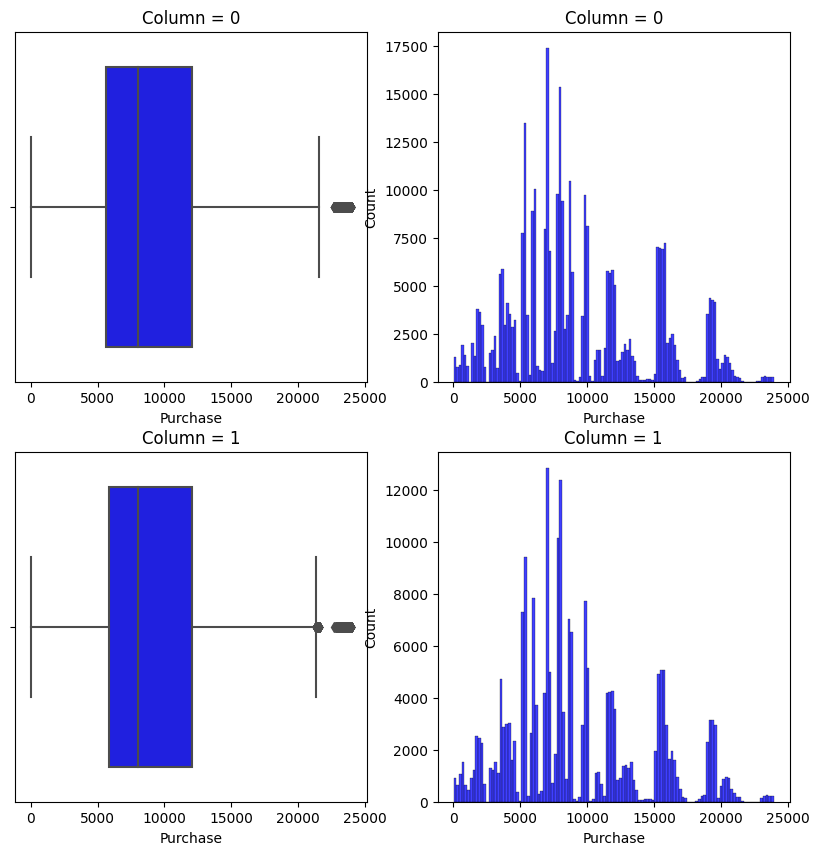

Mean Purchase for 0: 9265.907618921507
Standard Deviation Purchase for 0: 5027.347858674449

Mean Purchase for 1: 9261.174574082374
Standard Deviation Purchase for 1: 5016.897377793055



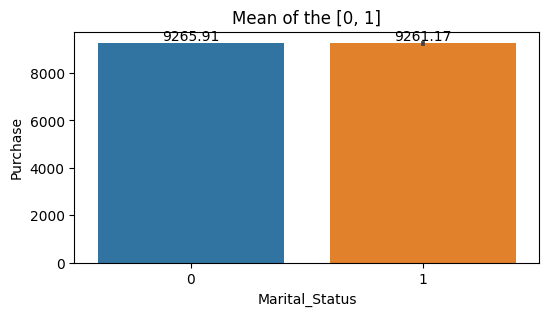

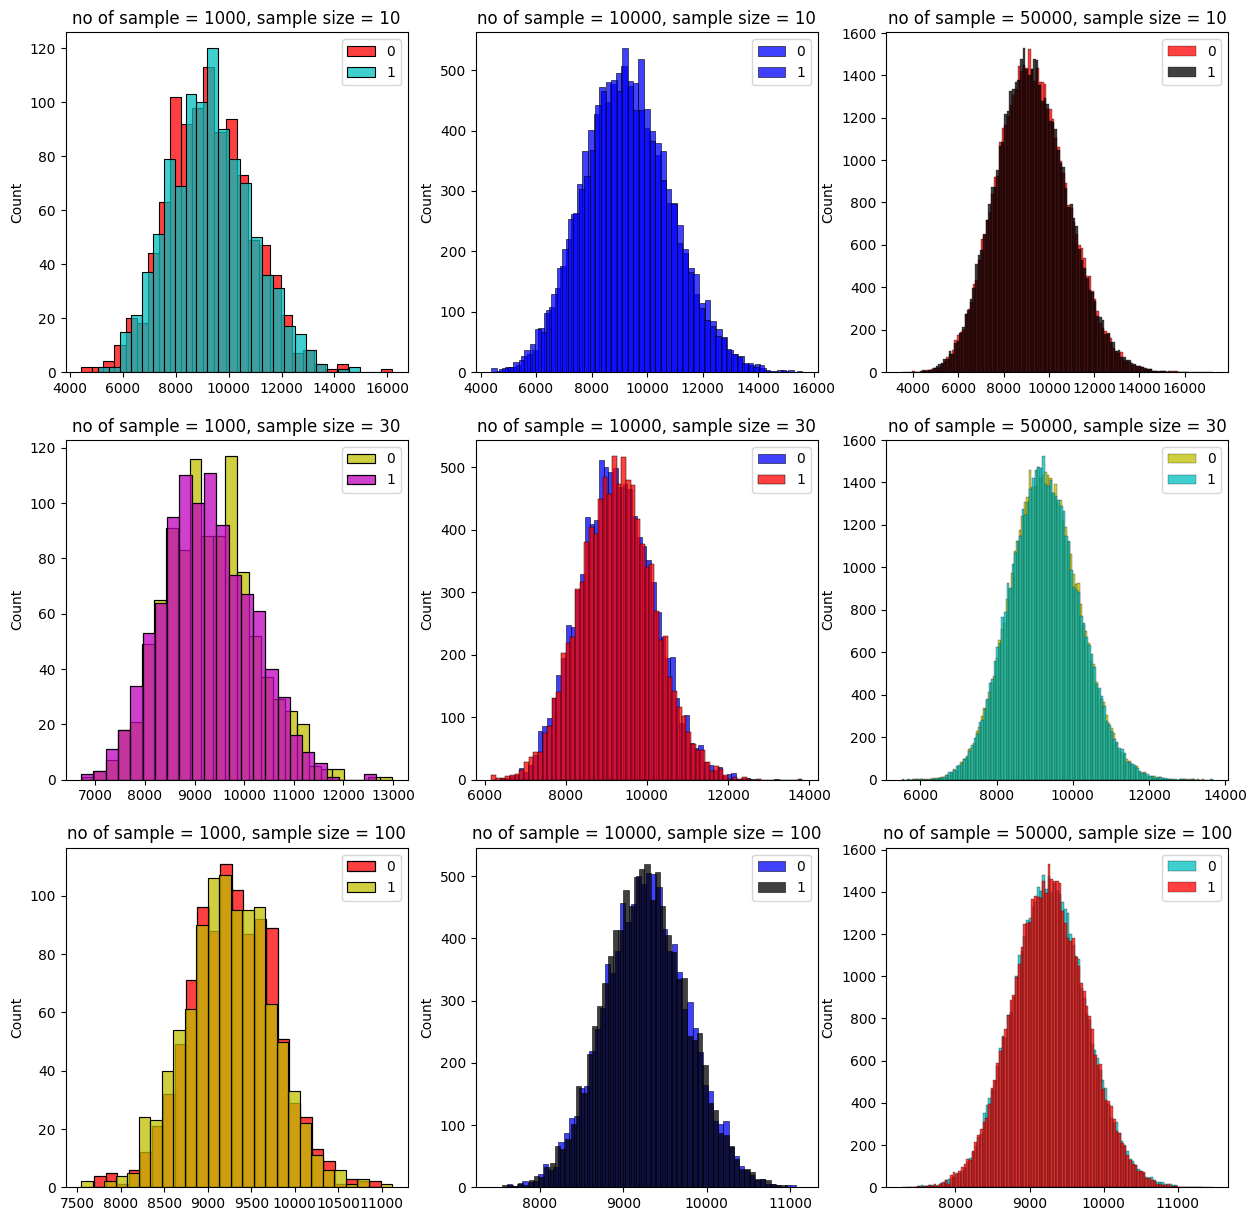

In [14]:
my_viz_analysis(df,"Purchase","Marital_Status")

Confidence Interval of the Mean of the Purchase made by: Marital_Status = 0
90.0% Confidence Interval: 8438.909  -  10092.906
95.0% Confidence Interval: 8280.547  -  10251.268
99.0% Confidence Interval: 7970.863  -  10560.952

Confidence Interval of the Mean of the Purchase made by: Marital_Status = 1
90.0% Confidence Interval: 8435.895  -  10086.454
95.0% Confidence Interval: 8277.863  -  10244.486
99.0% Confidence Interval: 7968.822  -  10553.527



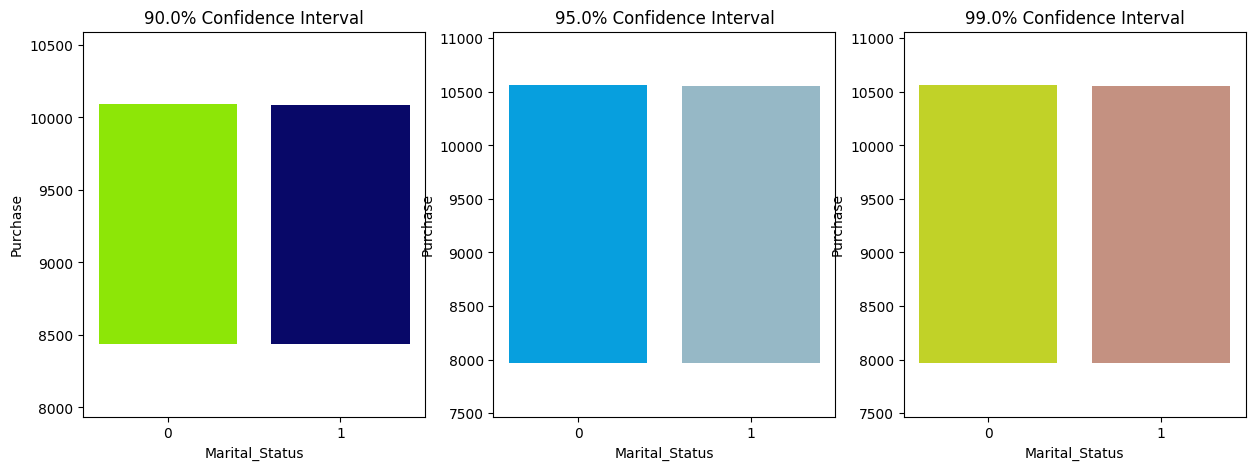

In [15]:
get_confidence_interval(df,"Purchase","Marital_Status") 

### ***Insights***
Confidence Interval of the Mean of the Purchase made by: Marital_Status = 0\
**90.0%** Confidence Interval: **8451.088  -  10084.145**\
**95.0%** Confidence Interval: **8294.731  -  10240.502**\
**99.0%** Confidence Interval: **7988.967  -  10546.266**

Confidence Interval of the Mean of the Purchase made by: Marital_Status = 1\
**90.0%** Confidence Interval: **8481.742  -  10106.823**\
**95.0%** Confidence Interval: **8326.15  -  10262.416**\
**99.0%** Confidence Interval: **8021.879  -  10566.687**

1. As we increase the confidance interval ,the range of values also increases.
2. Confidance Interval range of **Married** and **Un-Married** are overlapping.
3. Since the Confidance interval are overlapping it means there is **not a significant diffrance in the behaviour**.  

#  **7. Age: average purchase analysis**

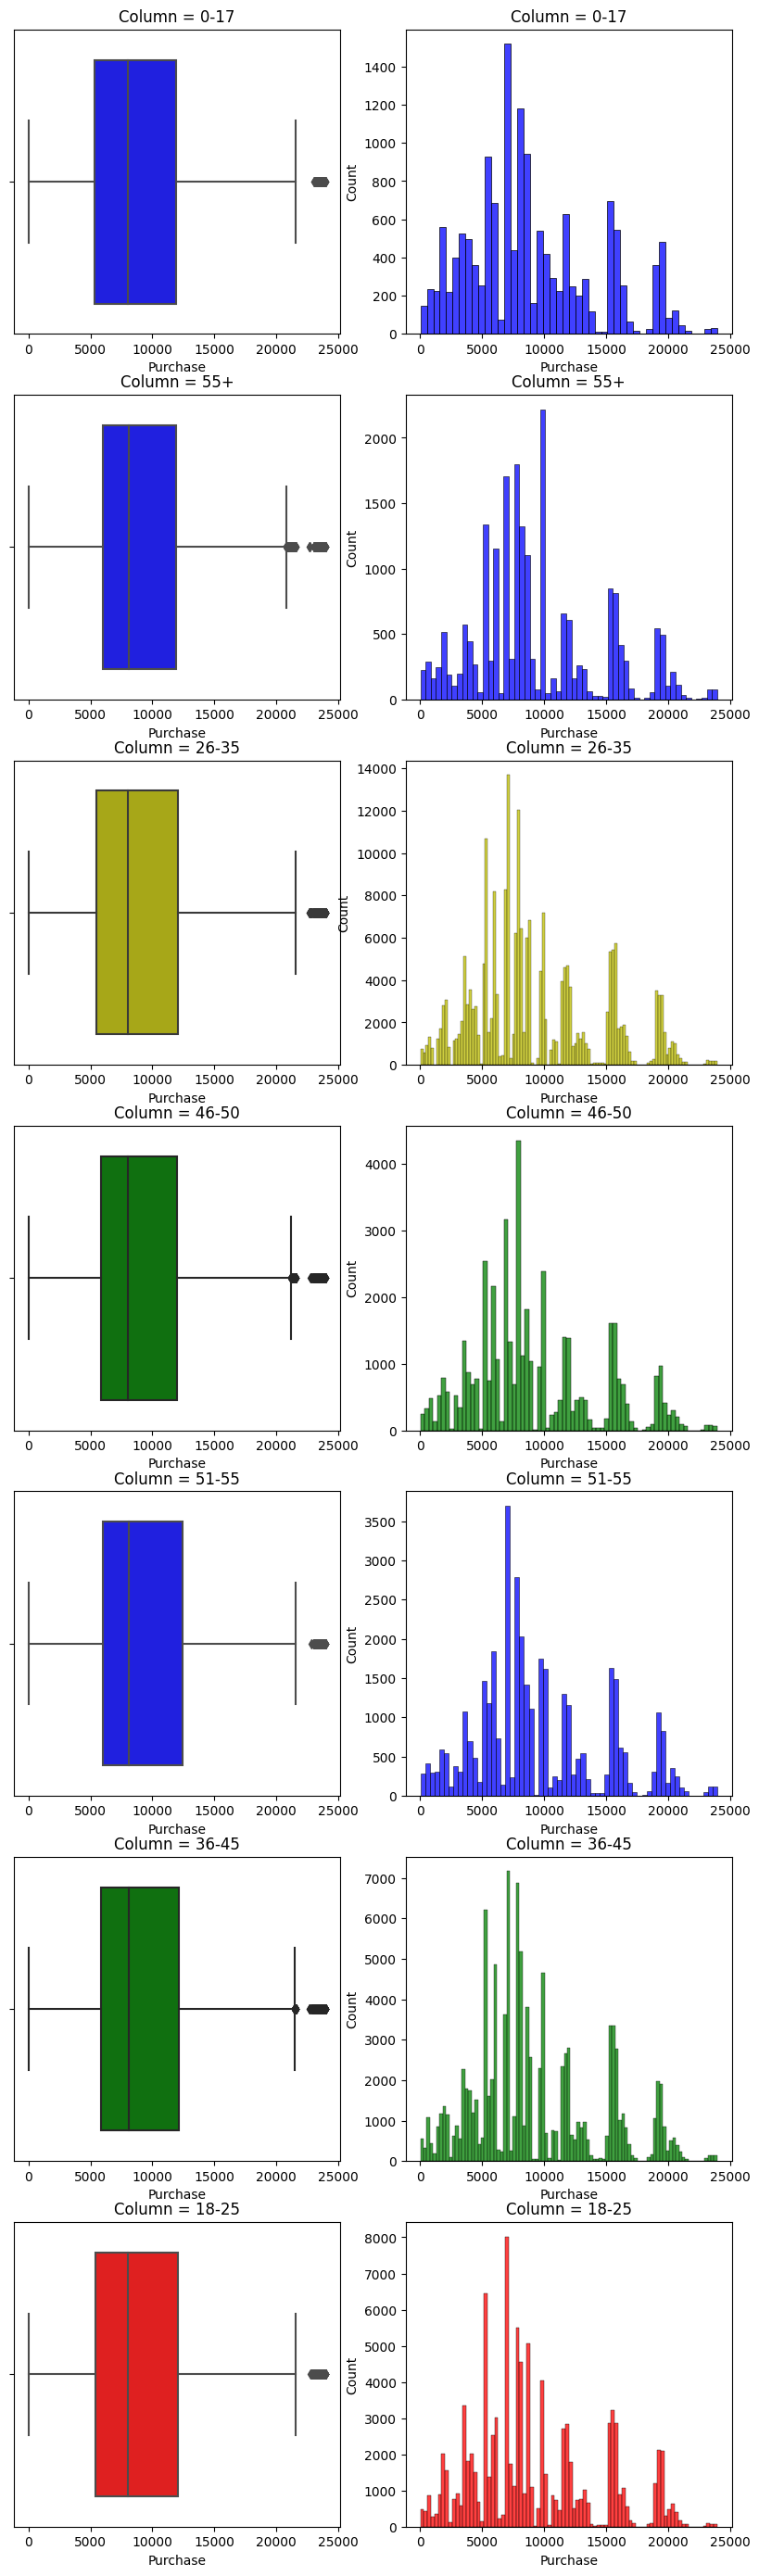

Mean Purchase for 0-17: 8933.464640444974
Standard Deviation Purchase for 0-17: 5111.11404600277

Mean Purchase for 55+: 9336.280459449405
Standard Deviation Purchase for 55+: 5011.4939956034605

Mean Purchase for 26-35: 9252.690632869888
Standard Deviation Purchase for 26-35: 5010.527303002956

Mean Purchase for 46-50: 9208.625697468327
Standard Deviation Purchase for 46-50: 4967.216367142941

Mean Purchase for 51-55: 9534.808030960236
Standard Deviation Purchase for 51-55: 5087.368079602135

Mean Purchase for 36-45: 9331.350694917874
Standard Deviation Purchase for 36-45: 5022.923879204662

Mean Purchase for 18-25: 9169.663606261289
Standard Deviation Purchase for 18-25: 5034.32199717658



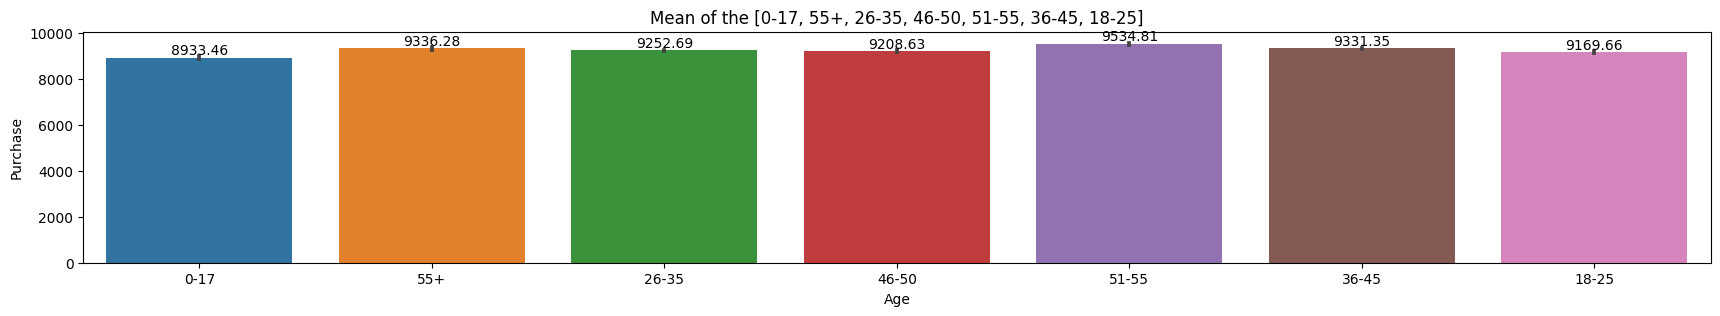

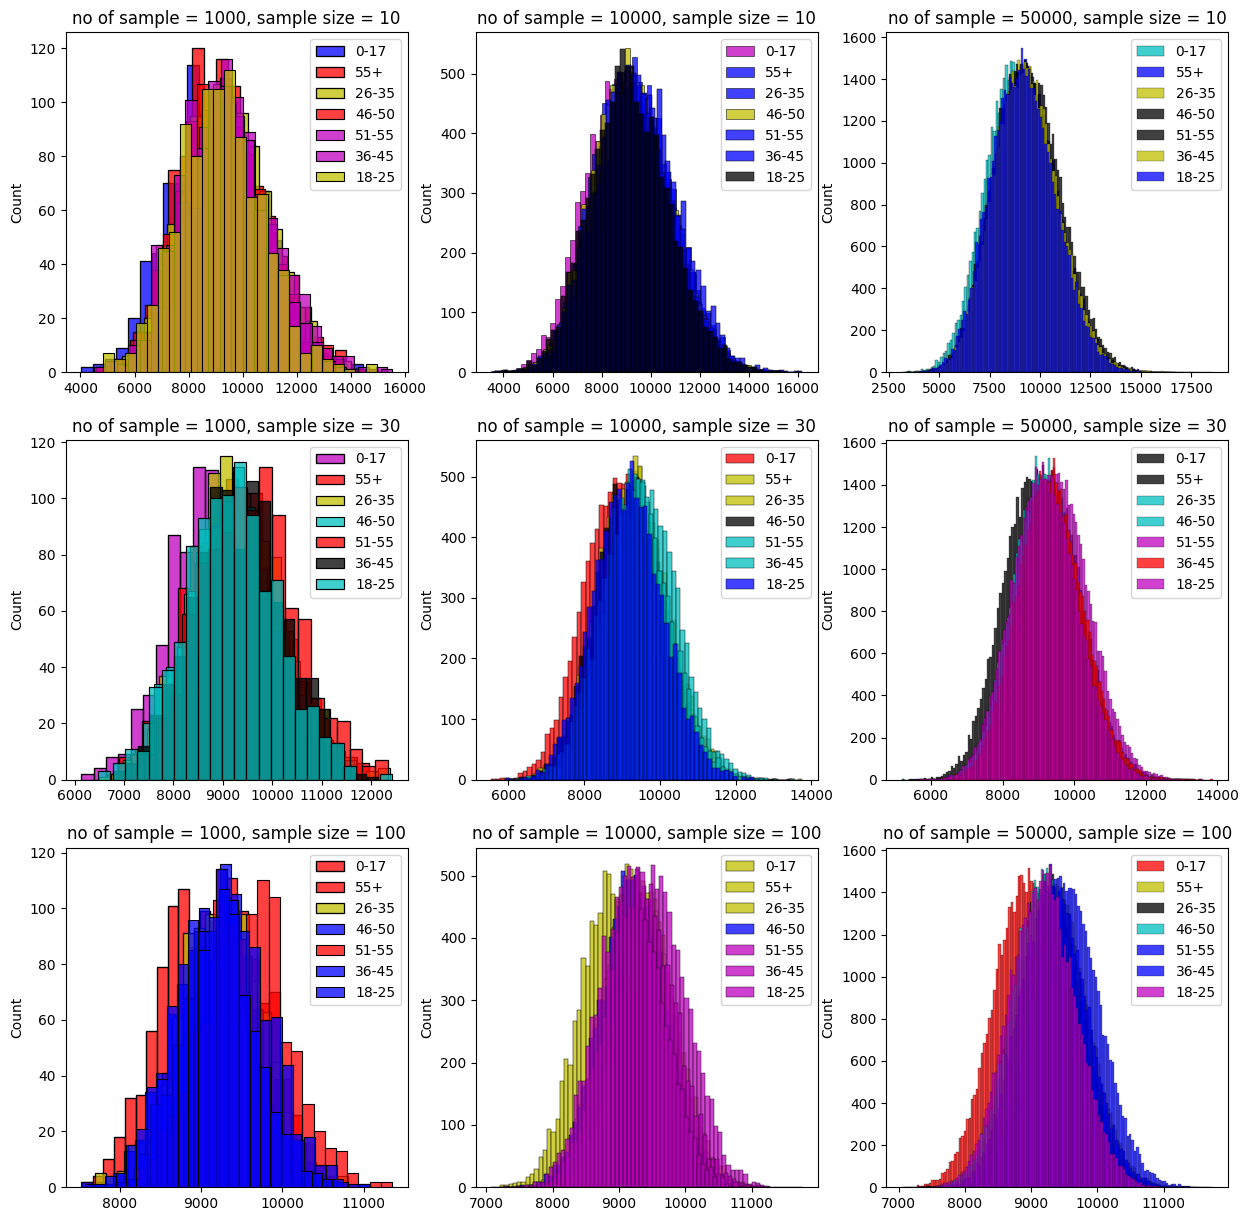

In [16]:
my_viz_analysis(df,"Purchase","Age")

Confidence Interval of the Mean of the Purchase made by: Age = 0-17
90.0% Confidence Interval: 8092.686  -  9774.243
95.0% Confidence Interval: 7931.686  -  9935.243
99.0% Confidence Interval: 7616.842  -  10250.088

Confidence Interval of the Mean of the Purchase made by: Age = 55+
90.0% Confidence Interval: 8511.89  -  10160.671
95.0% Confidence Interval: 8354.028  -  10318.533
99.0% Confidence Interval: 8045.32  -  10627.241

Confidence Interval of the Mean of the Purchase made by: Age = 26-35
90.0% Confidence Interval: 8428.459  -  10076.922
95.0% Confidence Interval: 8270.627  -  10234.754
99.0% Confidence Interval: 7961.979  -  10543.402

Confidence Interval of the Mean of the Purchase made by: Age = 46-50
90.0% Confidence Interval: 8391.519  -  10025.733
95.0% Confidence Interval: 8235.051  -  10182.2
99.0% Confidence Interval: 7929.071  -  10488.181

Confidence Interval of the Mean of the Purchase made by: Age = 51-55
90.0% Confidence Interval: 8697.936  -  10371.68
95.0% Confi

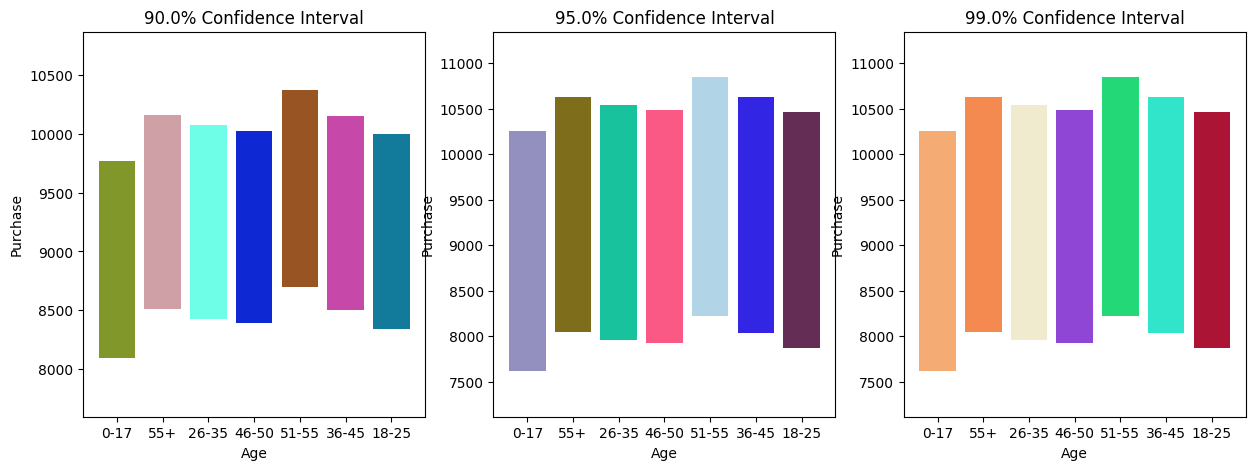

In [17]:
get_confidence_interval(df,"Purchase","Age")

### ***Insights***

Confidence Interval of the Mean of the Purchase made by: **Age = 0-17**\
**90.0%** Confidence Interval: **8260.229  -  9939.167**\
**95.0%** Confidence Interval: **8099.48  -  10099.917**\
**99.0%** Confidence Interval: **7785.126  -  10414.271**

Confidence Interval of the Mean of the Purchase made by: **Age = 55+**\
**90.0%** Confidence Interval: **8591.087  -  10172.187**\
**95.0%** Confidence Interval: **8439.705  -  10323.569**\
**99.0%** Confidence Interval: **8143.669  -  10619.605**

Confidence Interval of the Mean of the Purchase made by: **Age = 26-35**\
**90.0%** Confidence Interval: **8444.55  -  10076.183**\
**95.0%** Confidence Interval: **8288.329  -  10232.403**\
**99.0%** Confidence Interval: **7982.832  -  10537.9**

Confidence Interval of the Mean of the Purchase made by: **Age = 46-50**\
**90.0%** Confidence Interval: **8374.386  -  9958.455**\
**95.0%** Confidence Interval: **8222.72  -  10110.121**\
**99.0%** Confidence Interval: **7926.128  -  10406.713**

Confidence Interval of the Mean of the Purchase made by: **Age = 51-55**\
**90.0%** Confidence Interval: **8844.687  -  10507.431**\
**95.0%** Confidence Interval: **8685.488  -  10666.63**\
**99.0%** Confidence Interval: **8374.165  -  10977.953**

Confidence Interval of the Mean of the Purchase made by: **Age = 36-45**\
**90.0%** Confidence Interval: **8516.381  -  10140.516**\
**95.0%** Confidence Interval: **8360.879  -  10296.018**\
**99.0%** Confidence Interval: **8056.786  -  10600.111**

Confidence Interval of the Mean of the Purchase made by: **Age = 18-25**\
**90.0%** Confidence Interval: **8353.811  -  9992.143**\
**95.0%** Confidence Interval: **8196.949  -  10149.004**\
**99.0%** Confidence Interval: **7890.198  -  10455.756**

1. As we increase the confidance interval ,the range of values also increases.
2. Confidance Interval range are overlapping.
3. Since the Confidance interval are overlapping it means there is **not a significant diffrance in the behaviour**.  

#  **8. Recommendations**

### These recommendation are more appropriate for the **Black friday** kind of shopping event.
### As the provided data is from the same event.

1. The confidance intervale for **Male** Vs **Female** are overlapping which means there is not a significant diffrance in the Mean. However on performaing a **t-test**,  it looks that on the **90%** level of confidance, it fails the **Null Hypothesis(Ho)** i.e. **Mean(Male) and Mean(Female) are not same**.
2. Considering this Walmart some focus on **Female** customers to increase the purchase.
3. Customers who are **staying in the city for less then 1 year are purchasing more**, WalMart can utilize this information to targating these customers to increase the sales.
4. The confidance intervale analysis for **Married** Vs **Unmarried** and **Age Groups** are not providing any significant insights about the diffrances in purchasing behaviours, also the **CI Data is highly overlapping**.
5. Since the data provided is not having many **Continous Variable**, the correlation test can not be prformed for insights.
6 obuisly the less costly product **( Cost <= 15000)** have more sale,WalMart can use this information to decide the costing tolaunch a new product.
  